In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [9]:
df=pd.read_csv('Admissions_Dataset.csv')

In [10]:
df_1=df.head(10)
df_1

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
5,5,6,330.0,115.0,5.0,4.5,3.0,9.34,1.0,0.90
6,6,7,321.0,109.0,3.0,3.0,4.0,8.20,1.0,0.75
7,7,8,308.0,101.0,2.0,3.0,4.0,7.90,1.0,0.68
8,8,9,302.0,102.0,1.0,2.0,1.5,8.00,0.0,0.50
9,9,10,323.0,108.0,3.0,3.5,3.0,8.60,0.0,0.45


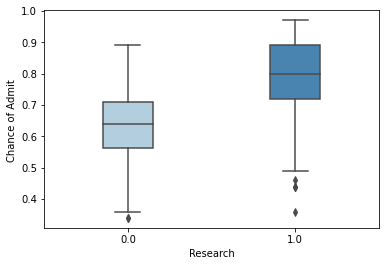

In [11]:
sns.boxplot( x=df["Research"], y=df["Chance of Admit "], width=0.3, palette="Blues");
plt.show()

In [12]:
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [13]:
df.isnull().values.any()

False

In [14]:
print(df.isnull())

     Unnamed: 0  Serial No.  GRE Score  TOEFL Score  University Rating    SOP  \
0         False       False      False        False              False  False   
1         False       False      False        False              False  False   
2         False       False      False        False              False  False   
3         False       False      False        False              False  False   
4         False       False      False        False              False  False   
..          ...         ...        ...          ...                ...    ...   
495       False       False      False        False              False  False   
496       False       False      False        False              False  False   
497       False       False      False        False              False  False   
498       False       False      False        False              False  False   
499       False       False      False        False              False  False   

      LOR    CGPA  Research

In [15]:
sorted_df=df.sort_values(by=["Chance of Admit "],ascending=False)

In [16]:
sorted_df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,202,203,340.0,120.0,5.0,4.5,4.5,9.91,1.0,0.97
143,143,144,340.0,120.0,4.0,4.5,4.0,9.92,1.0,0.97
24,24,25,336.0,119.0,5.0,4.0,3.5,9.80,1.0,0.97
203,203,204,334.0,120.0,5.0,4.0,5.0,9.87,1.0,0.97
71,71,72,336.0,112.0,5.0,5.0,5.0,9.76,1.0,0.96
...,...,...,...,...,...,...,...,...,...,...
457,457,458,295.0,99.0,1.0,2.0,1.5,7.57,0.0,0.37
94,94,95,303.0,99.0,3.0,2.0,2.5,7.66,0.0,0.36
58,58,59,300.0,99.0,1.0,3.0,2.0,6.80,1.0,0.36
92,92,93,298.0,98.0,2.0,4.0,3.0,8.03,0.0,0.34


In [17]:
sorted_df["GRE Score"].fillna(method ='ffill',inplace=True)
sorted_df["TOEFL Score"].fillna(method ='ffill',inplace=True) 
sorted_df["University Rating"].fillna(method ='ffill',inplace=True) 
sorted_df["SOP"].fillna(method ='ffill',inplace=True) 
sorted_df["LOR "].fillna(method ='ffill',inplace=True) 
sorted_df["CGPA"].fillna(method ='ffill',inplace=True)
sorted_df["Research"].fillna(0)

202    1.0
143    1.0
24     1.0
203    1.0
71     1.0
      ... 
457    0.0
94     0.0
58     1.0
92     0.0
376    0.0
Name: Research, Length: 500, dtype: float64

In [18]:
sorted_df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,202,203,340.0,120.0,5.0,4.5,4.5,9.91,1.0,0.97
143,143,144,340.0,120.0,4.0,4.5,4.0,9.92,1.0,0.97
24,24,25,336.0,119.0,5.0,4.0,3.5,9.80,1.0,0.97
203,203,204,334.0,120.0,5.0,4.0,5.0,9.87,1.0,0.97
71,71,72,336.0,112.0,5.0,5.0,5.0,9.76,1.0,0.96
...,...,...,...,...,...,...,...,...,...,...
457,457,458,295.0,99.0,1.0,2.0,1.5,7.57,0.0,0.37
94,94,95,303.0,99.0,3.0,2.0,2.5,7.66,0.0,0.36
58,58,59,300.0,99.0,1.0,3.0,2.0,6.80,1.0,0.36
92,92,93,298.0,98.0,2.0,4.0,3.0,8.03,0.0,0.34


In [19]:
df=sorted_df.sort_values(by=["Serial No."],ascending=True)
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...,...
495,495,496,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,496,497,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,497,498,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,498,499,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [20]:
x = df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ','CGPA','Research']]
y = df['Chance of Admit ']

In [21]:
x.shape , y.shape


((500, 6), (500,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train, x_test, y_train, y_test

(     GRE Score  TOEFL Score  SOP  LOR   CGPA  Research
 86       315.0        106.0  4.5   3.5  8.42       0.0
 226      306.0        110.0  3.5   4.0  8.45       0.0
 93       301.0         97.0  3.0   3.0  7.88       1.0
 98       332.0        119.0  5.0   4.5  9.24       1.0
 81       340.0        120.0  5.0   5.0  9.50       1.0
 ..         ...          ...  ...   ...   ...       ...
 293      312.0         98.0  3.5   3.0  8.18       1.0
 365      330.0        114.0  4.5   3.0  9.17       1.0
 491      297.0         99.0  3.0   3.5  7.81       0.0
 36       299.0        106.0  4.0   4.0  8.40       0.0
 53       324.0        112.0  4.0   2.5  8.10       1.0
 
 [350 rows x 6 columns],
      GRE Score  TOEFL Score  SOP  LOR   CGPA  Research
 389      320.0        108.0  3.5   4.0  8.44       1.0
 222      324.0        113.0  4.5   4.0  8.79       0.0
 408      297.0        101.0  2.0   4.0  7.67       1.0
 38       304.0        105.0  3.0   1.5  7.50       0.0
 336      319.0      

In [23]:
x_train.shape, y_train.shape, x_test.shape , y_test.shape

((350, 6), (350,), (150, 6), (150,))

In [24]:
pass_or_fail =[]

for row in df['Chance of Admit ']:
    if row>=0.7:
        pass_or_fail.append(1)
    else:
        pass_or_fail.append(0)
print(len(pass_or_fail))
df['Result']=pass_or_fail
len(df[df['Result']==1])

500


300

In [25]:
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Result
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1
2,2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80,1
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65,0
...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87,1
496,496,497,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96,1
497,497,498,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93,1
498,498,499,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73,1


In [26]:
X= df.drop('Result',axis=1)
Y= df['Result']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,stratify=Y ,random_state = 0)

In [28]:
print(X.shape , X_train.shape , X_test.shape)

(500, 10) (350, 10) (150, 10)


In [29]:
model_2=LogisticRegression()

In [30]:
model_2.fit(X_train, Y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
X_train_pred=model_2.predict(X_train)

In [32]:
accuracy_train=accuracy_score(X_train_pred,Y_train)
accuracy_train

0.8371428571428572

In [33]:
X_test_pred=model_2.predict(X_test)
accuracy_test=accuracy_score(X_test_pred,Y_test)
accuracy_test

0.84

In [34]:
model_2_conf=confusion_matrix(Y_test,X_test_pred)
print(model_2_conf)

[[48 12]
 [12 78]]


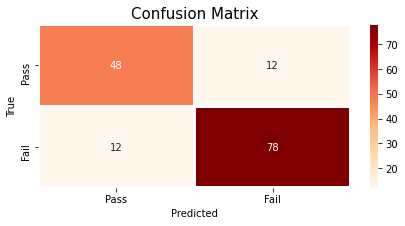

In [35]:
model_2_conf = confusion_matrix(Y_test, X_test_pred)  
plt.figure(figsize=(7,3))
class_label = ["Pass", "Fail"]
model_2_conf= pd.DataFrame(model_2_conf, index=class_label,columns=class_label)
sns.heatmap(model_2_conf,annot=True,cmap='OrRd',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [36]:
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        60
           1       0.87      0.87      0.87        90

    accuracy                           0.84       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.84      0.84       150



In [37]:
input_=[496,332,108,5.0,4.5,4.0,9.02,1,0.87,1]
input_= np.asarray(input_)
input_= input_.reshape(1,-1)
pred=model_2.predict(input_)
if pred[0]==1:
    print("Pass")
else:
    print("Fail")

Pass
